# Cognetti - Price Regression on AirBnB Data
# AIT664
# December 3, 2024

<hr>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn import metrics
from sklearn.decomposition import PCA
import numpy as np

In [4]:
listings_df = pd.read_csv('O:\Big Files for School\AIT 664\listings.csv', sep=",",low_memory=False)

In [5]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,739333866230665371,https://www.airbnb.com/rooms/739333866230665371,20240904164109,2024-09-04,city scrape,Lovely room 2 windows tv work desk ac included,"Lovely vocation room, has work desk , tv, 2 wi...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,3013025,...,NaN,NaN,NaN,NaN,f,1,0,1,0,NaN
1,572612125615500056,https://www.airbnb.com/rooms/572612125615500056,20240904164109,2024-09-04,city scrape,Room by Sunny & Bay! Sunset Park & Bay Ridge,Cozy room in a charming Sunset Park apartment....,NaN,https://a0.muscache.com/pictures/5f44a178-6043...,358089614,...,4.83,4.67,4.67,NaN,t,2,0,2,0,0.21
2,45267941,https://www.airbnb.com/rooms/45267941,20240904164109,2024-09-04,city scrape,Private Room in Luxury Apartment,NaN,NaN,https://a0.muscache.com/pictures/3c15a88e-b08a...,39162543,...,NaN,NaN,NaN,NaN,f,3,2,1,0,NaN
3,838141198693830649,https://www.airbnb.com/rooms/838141198693830649,20240904164109,2024-09-04,city scrape,Modern renovated huge apartment,NaN,NaN,https://a0.muscache.com/pictures/prohost-api/H...,148571080,...,NaN,NaN,NaN,NaN,f,5,5,0,0,NaN
4,1082660771919357919,https://www.airbnb.com/rooms/1082660771919357919,20240904164109,2024-09-04,city scrape,Summertime Park Slope townhouse,425 10th Street is what dreams are made of! S...,NaN,https://a0.muscache.com/pictures/hosting/Hosti...,394869975,...,NaN,NaN,NaN,NaN,f,3,3,0,0,NaN


In [6]:
# Cutting Listings down to all I care about
price_df = listings_df[['neighbourhood_group_cleansed','accommodates', 'bathrooms', 'bedrooms', 'beds', 
                              'price', 'review_scores_rating', 'review_scores_accuracy', 
                              'review_scores_cleanliness', 'review_scores_checkin', 
                              'review_scores_communication', 'review_scores_location', 
                              'review_scores_value']]


In [7]:
price_df.head()

,neighbourhood_group_cleansed,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,Brooklyn,1,1.0,1.0,1.0,$89.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brooklyn,1,1.0,1.0,1.0,$45.00,4.83,4.83,4.67,5.0,4.83,4.67,4.67
2,Bronx,2,1.0,1.0,1.0,$107.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Manhattan,8,2.0,3.0,3.0,$140.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brooklyn,5,2.5,4.0,4.0,$340.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for column in price_df.columns:
    missing_percentage = price_df[column].isnull().mean() * 100
    print(f"Column \"{column}\" is missing {missing_percentage:.2f}% values.")

Column "neighbourhood_group_cleansed" is missing 0.00% values.
Column "accommodates" is missing 0.00% values.
Column "bathrooms" is missing 39.29% values.
Column "bedrooms" is missing 15.56% values.
Column "beds" is missing 39.65% values.
Column "price" is missing 39.29% values.
Column "review_scores_rating" is missing 30.74% values.
Column "review_scores_accuracy" is missing 30.77% values.
Column "review_scores_cleanliness" is missing 30.74% values.
Column "review_scores_checkin" is missing 30.78% values.
Column "review_scores_communication" is missing 30.76% values.
Column "review_scores_location" is missing 30.79% values.
Column "review_scores_value" is missing 30.79% values.


In [9]:
#Kill Nulls

In [10]:
price_df = price_df.dropna()

In [11]:
#There's a 100,000 listing, whyyyy
price_df = price_df[price_df['price'] != 100000]


In [12]:
#Fix Price

In [13]:
price_df['price'] = price_df['price'].replace('[\$,]', '', regex=True).astype(float)



Let's see some of this data...

In [15]:
price_df['price'].describe()

count     15988.000000
mean        211.269264
std        1141.822584
min          10.000000
25%          89.000000
50%         143.000000
75%         225.000000
max      100000.000000
Name: price, dtype: float64

In [16]:
print(price_df['price'].dtype)

float64


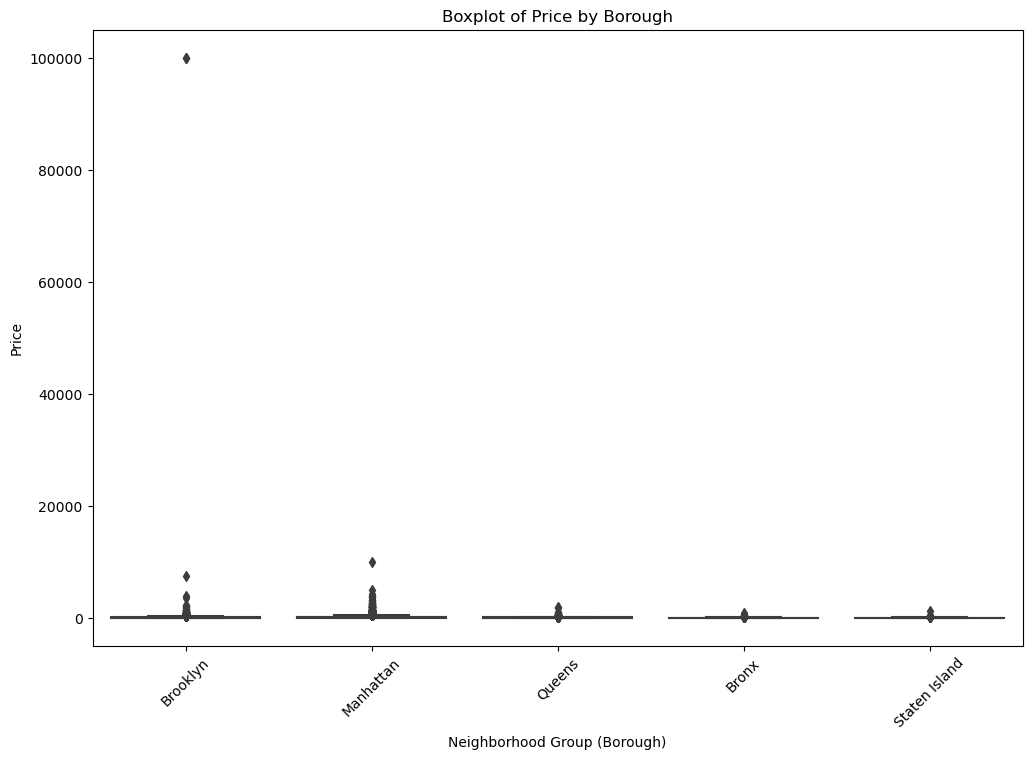

In [17]:
#Boxplot of all groups by price
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=price_df)
plt.title('Boxplot of Price by Borough')
plt.xlabel('Neighborhood Group (Borough)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

Let's try with IQR

In [19]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = price_df['price'].quantile(0.25)
Q3 = price_df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
price_df = price_df[(price_df['price'] >= lower_bound) & (price_df['price'] <= upper_bound)]


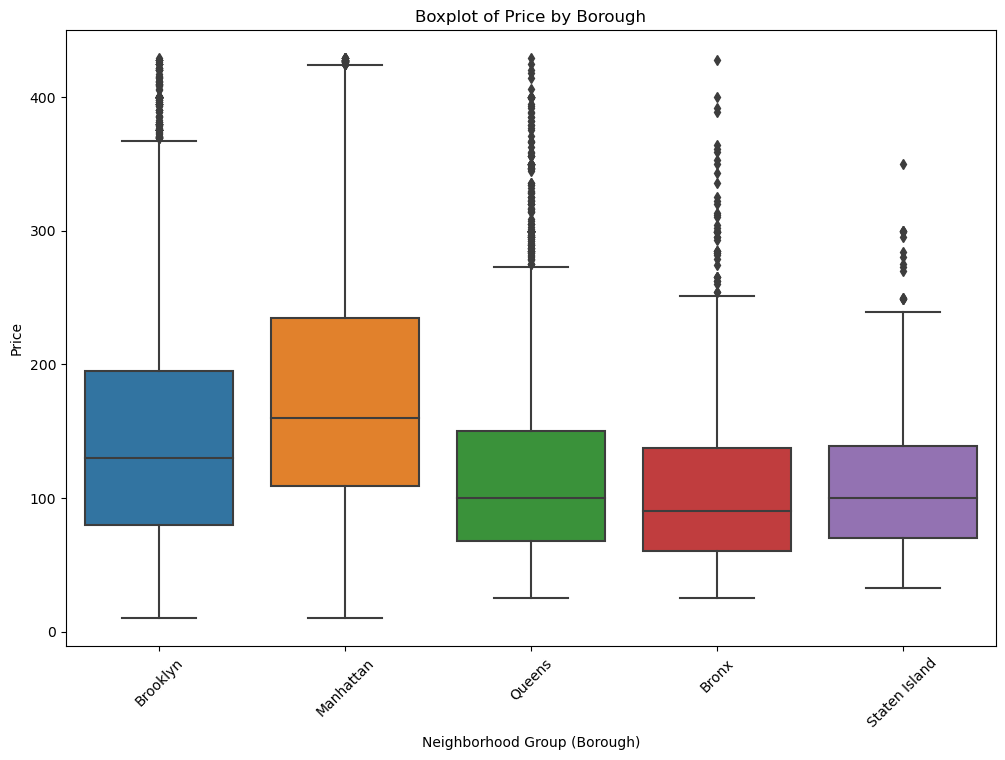

In [20]:
#Boxplot of all groups by price
plt.figure(figsize=(12, 8))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=price_df)
plt.title('Boxplot of Price by Borough')
plt.xlabel('Neighborhood Group (Borough)')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

### Lasso Time!

In [22]:
# Features and target variable
X = price_df[['neighbourhood_group_cleansed','accommodates', 'bathrooms', 'bedrooms', 'beds', 
                    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
                    'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
                    'review_scores_value']]
y = price_df['price']

In [23]:
X = pd.get_dummies(X, columns=['neighbourhood_group_cleansed'], drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [24]:
lasso = Lasso(alpha=1.5)  # You can adjust the alpha parameter as needed
lasso.fit(X_train, y_train)

Lasso(alpha=1.5)

In [25]:
y_pred = lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5554.64759579789


In [26]:
# Predictions on the test set
y_pred = lasso.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')


Mean Squared Error: 5554.64759579789
Mean Absolute Error: 56.80364793341269
R-squared: 0.30751758524583384


plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


Starting to see a diagonal, but not great...

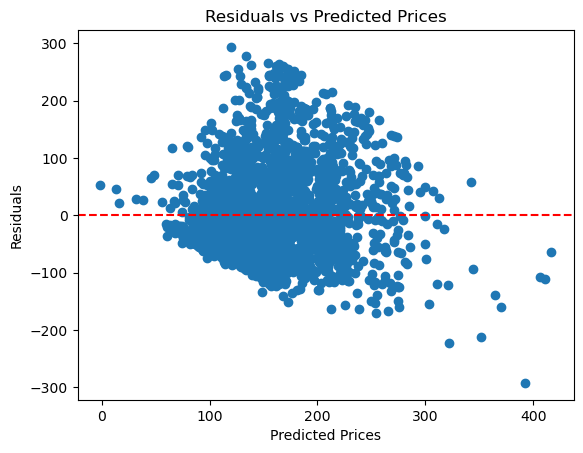

In [29]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Prices')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Not super random.... kind of clustered, especially at the low end.

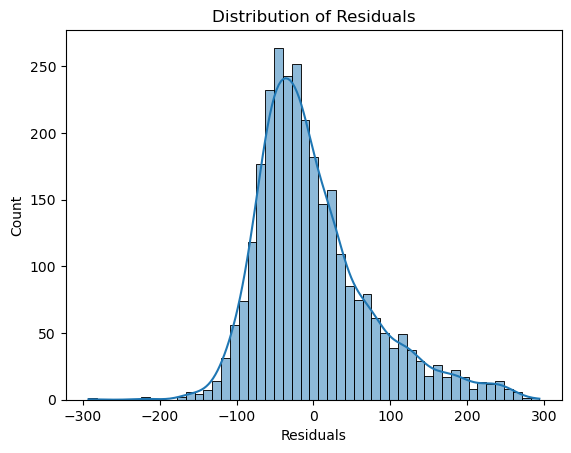

In [31]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()


Surprisingly normal, but there is a left skew.

In [79]:
# Loop through a range of alpha values and evaluate the model
alphas = [i * 0.1 for i in range(1, 20)]
results = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    y_pred = lasso.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append((alpha, mse, rmse, mae, r2))
    
    # Print the evaluation metrics for each alpha
    print(f'Alpha: {alpha}')
    print(f'Mean Squared Error: {mse}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Mean Absolute Error: {mae}')
    print(f'R-squared: {r2}')
    print('-' * 50)



Alpha: 0.1
Mean Squared Error: 6517.382018440526
Root Mean Squared Error: 80.73030421372464
Mean Absolute Error: 62.12711289821962
R-squared: 0.2139362101955784
--------------------------------------------------
Alpha: 0.2
Mean Squared Error: 6518.352060976958
Root Mean Squared Error: 80.7363119109175
Mean Absolute Error: 62.141662226986426
R-squared: 0.2138192130162967
--------------------------------------------------
Alpha: 0.30000000000000004
Mean Squared Error: 6519.25538671466
Root Mean Squared Error: 80.74190601363495
Mean Absolute Error: 62.156298873210766
R-squared: 0.2137102625741103
--------------------------------------------------
Alpha: 0.4
Mean Squared Error: 6520.20748358182
Root Mean Squared Error: 80.74780172600255
Mean Absolute Error: 62.17148837757081
R-squared: 0.21359542982845514
--------------------------------------------------
Alpha: 0.5
Mean Squared Error: 6521.208671627763
Root Mean Squared Error: 80.75400096359166
Mean Absolute Error: 62.1867178331255
R-squa

In [77]:
results_df

,Alpha,MSE,RMSE,R-squared
0,0.1,5469.088807,73.953288,0.318184
1,0.2,5473.710303,73.984527,0.317608
2,0.3,5478.936631,74.019839,0.316956
3,0.4,5483.512352,74.050742,0.316386
4,0.5,5487.721488,74.079157,0.315861
5,0.6,5492.382866,74.110612,0.315280
6,0.7,5497.496540,74.145105,0.314642
7,0.8,5503.143929,74.183178,0.313938
8,0.9,5509.263088,74.224410,0.313176
9,1.0,5515.849837,74.268768,0.312354


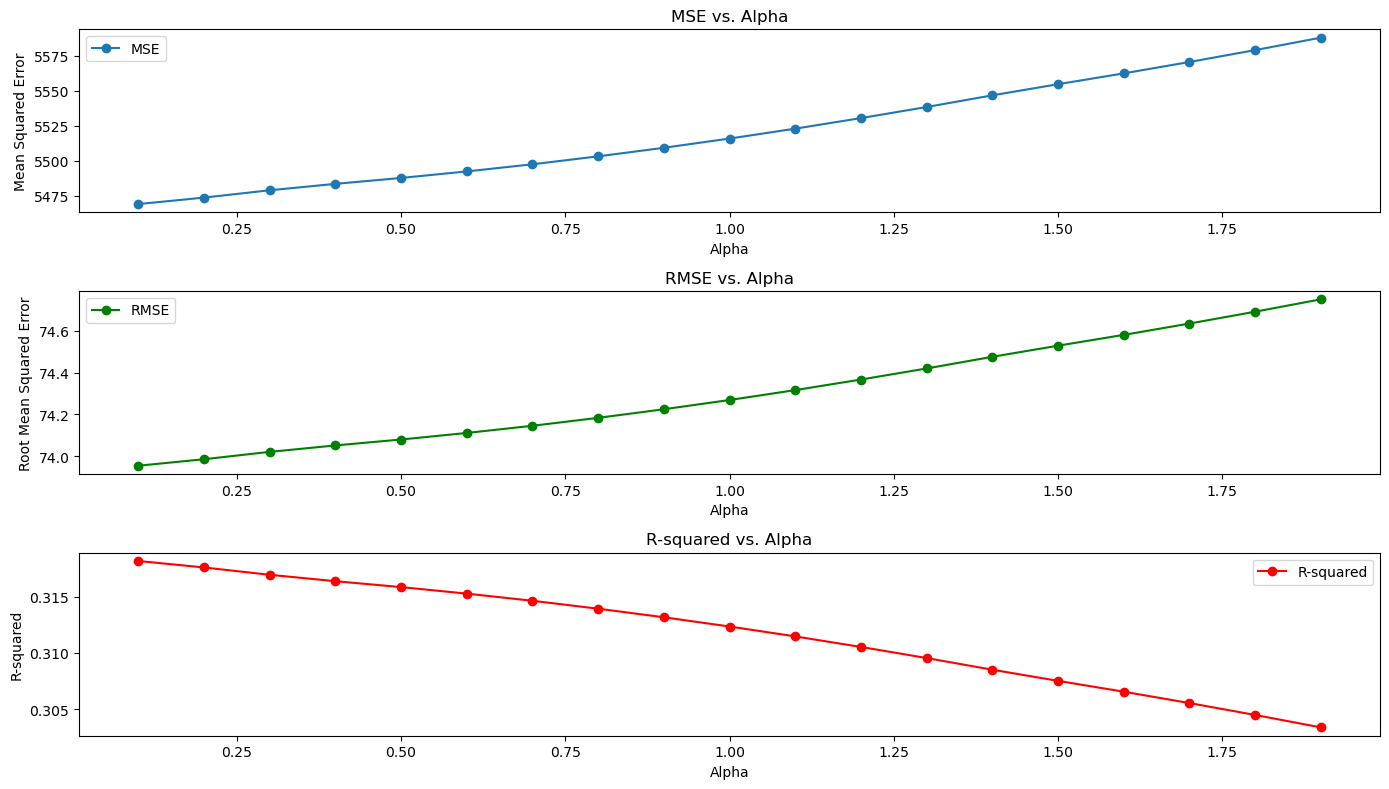

In [34]:
# Convert results to a DataFrame for easier plotting
results_df = pd.DataFrame(results, columns=['Alpha', 'MSE', 'RMSE', 'R-squared'])

# Plot the results
plt.figure(figsize=(14, 8))

# Plot MSE
plt.subplot(3, 1, 1)
plt.plot(results_df['Alpha'], results_df['MSE'], marker='o', label='MSE')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs. Alpha')
plt.legend()

# Plot RMSE
plt.subplot(3, 1, 2)
plt.plot(results_df['Alpha'], results_df['RMSE'], marker='o', color='green', label='RMSE')
plt.xlabel('Alpha')
plt.ylabel('Root Mean Squared Error')
plt.title('RMSE vs. Alpha')
plt.legend()

# Plot R-squared
plt.subplot(3, 1, 3)
plt.plot(results_df['Alpha'], results_df['R-squared'], marker='o', color='red', label='R-squared')
plt.xlabel('Alpha')
plt.ylabel('R-squared')
plt.title('R-squared vs. Alpha')
plt.legend()

plt.tight_layout()
plt.show()


### Linar Regressions

Mean Squared Error: 6316.967462446632
Root Mean Squared Error: 79.47935242845548
R-squared: 0.21248129482997602
              Coefficient
accommodates    24.637288


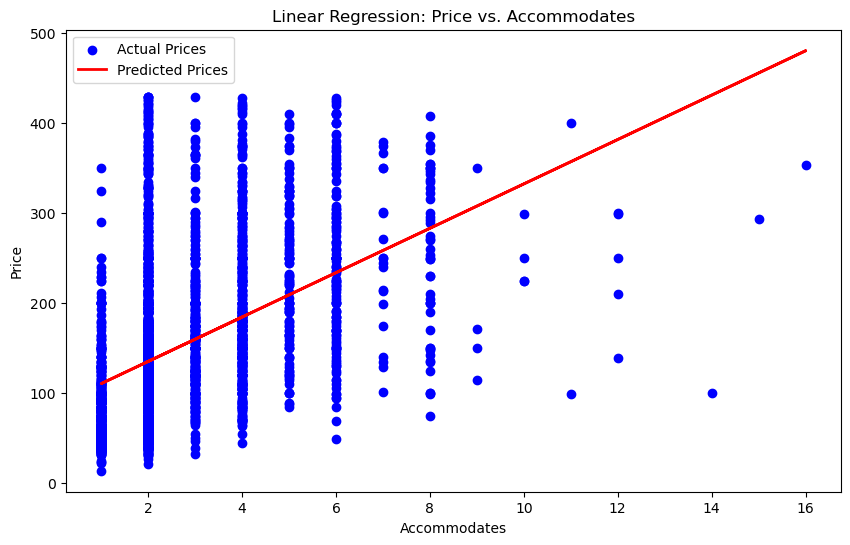

Linear Regression Results:
[{'feature': 'Accommodates', 'MSE': 6316.967462446632, 'RMSE': 79.47935242845548, 'R-squared': 0.21248129482997602}]


In [36]:
# Initialize the results list
linear_results = []

# Features and target variable
X = price_df[['accommodates']]
y = price_df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Append the results to the list
linear_results.append({
    'feature': 'Accommodates',
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2
})

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=['accommodates'], columns=['Coefficient'])
print(coefficients)

# Optionally plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.legend()
plt.show()

# Display the stored results
print("Linear Regression Results:")
print(linear_results)


Mean Squared Error: 7117.213591494609
R^2 Score: 0.1127168431192972
              Coefficient
accommodates    29.974618


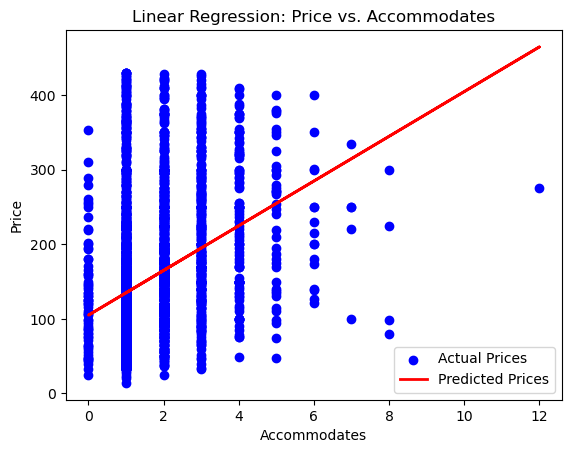

In [37]:

# Features and target variable
X = price_df[['beds']]
y = price_df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Append the results to the list
linear_results.append({
    'feature': 'Beds',
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2
})

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=['accommodates'], columns=['Coefficient'])
print(coefficients)

# Optionally plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.legend()
plt.show()


Mean Squared Error: 7446.124869625336
R^2 Score: 0.07171239194724621
              Coefficient
accommodates    29.206562


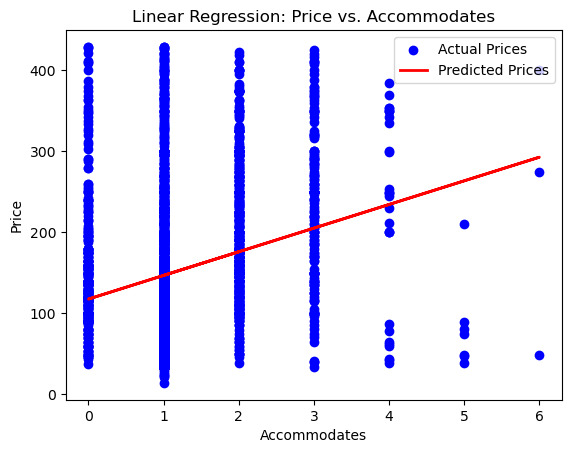

In [38]:
# Features and target variable
X = price_df[['bedrooms']]
y = price_df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Append the results to the list
linear_results.append({
    'feature': 'Bedrooms',
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2
})

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=['accommodates'], columns=['Coefficient'])
print(coefficients)

# Optionally plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.legend()
plt.show()


Mean Squared Error: 7973.528227035368
R^2 Score: 0.005962487171101261
              Coefficient
accommodates     13.32671


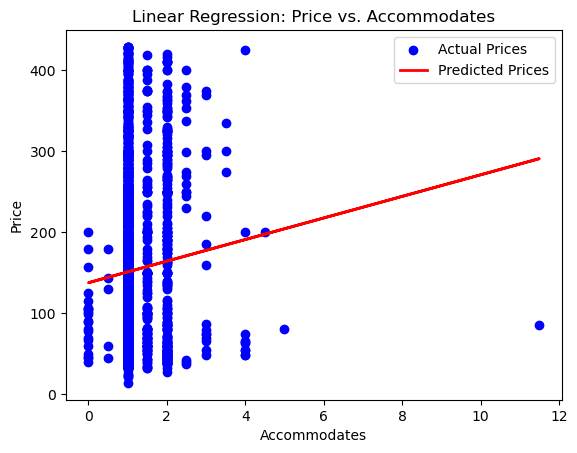

In [39]:
# Features and target variable
X = price_df[['bathrooms']]
y = price_df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Append the results to the list
linear_results.append({
    'feature': 'Bathrooms',
    'MSE': mse,
    'RMSE': rmse,
    'R-squared': r2
})

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=['accommodates'], columns=['Coefficient'])
print(coefficients)

# Optionally plot the results
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.title('Linear Regression: Price vs. Accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Price')
plt.legend()
plt.show()


In [40]:
# Features and target variable
X = price_df[['accommodates', 'bathrooms', 'bedrooms', 'beds']]
y = price_df['price']

# List of categorical columns to encode
categorical_columns = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Apply ordinal encoding to the categorical-like numerical variables and the neighborhood group
ordinal_encoder = OrdinalEncoder()
X.loc[:, categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, index=X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 6516.424777738285
Root Mean Squared Error: 80.72437536294899
Mean Absolute Error: 62.11233510219371
R-squared: 0.21405166334103298
              Coefficient
accommodates    39.167852
bathrooms       -1.513184
bedrooms         0.167911
beds             2.823008


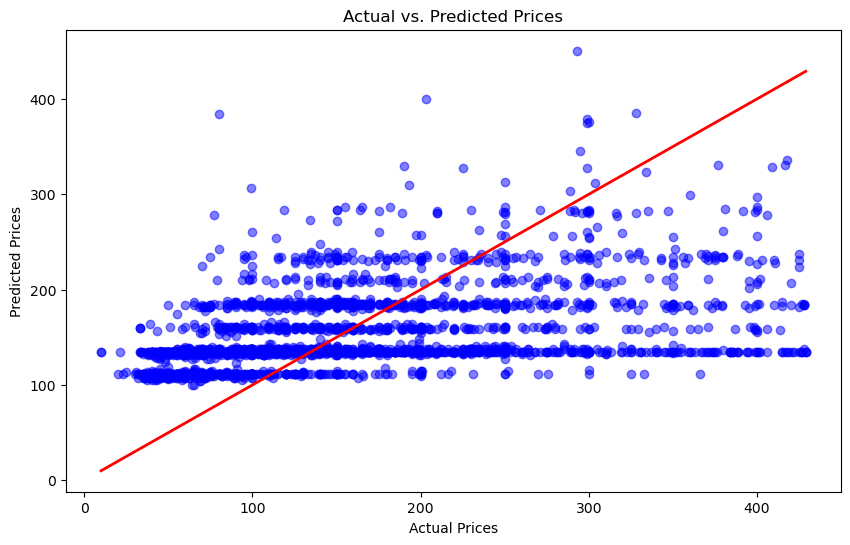

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


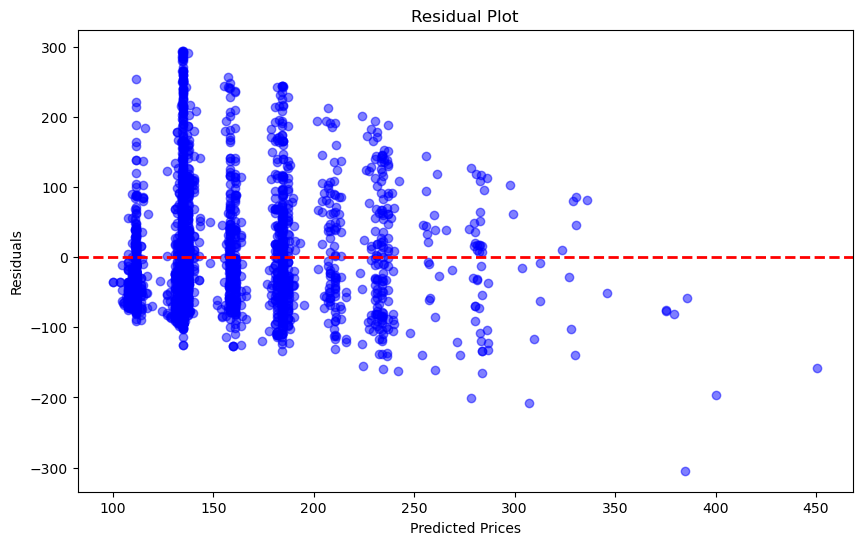

In [42]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()


<Figure size 1200x800 with 0 Axes>

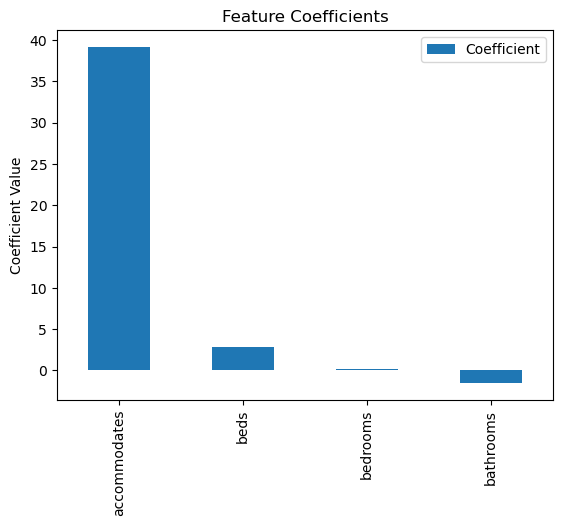

In [43]:
plt.figure(figsize=(12, 8))
coefficients.sort_values(by='Coefficient', ascending=False).plot(kind='bar')
plt.title('Feature Coefficients')
plt.ylabel('Coefficient Value')
plt.show()


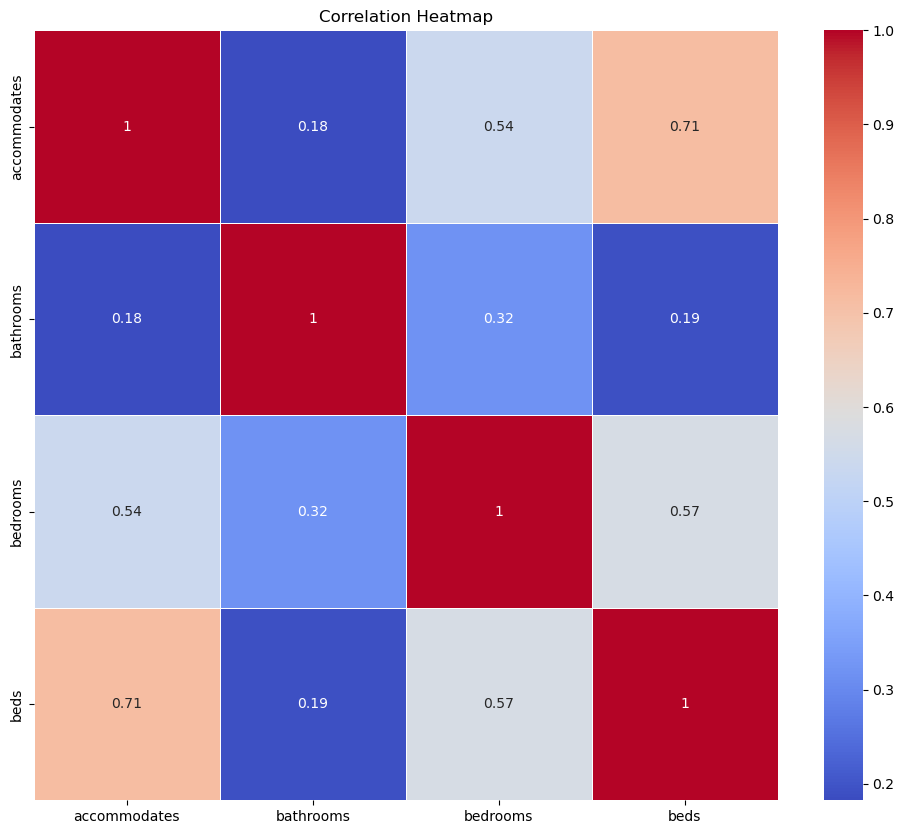

In [44]:
correlation_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [56]:
# List of categorical columns to encode
categorical_columns = ['accommodates', 'beds', 'bedrooms', 'bathrooms']

# Apply ordinal encoding to the categorical-like numerical variables and the neighborhood group
ordinal_encoder = OrdinalEncoder()
X.loc[:, categorical_columns] = ordinal_encoder.fit_transform(X[categorical_columns])

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=44)

# Initialize the linear regression model
model = LinearRegression()

# Create the SequentialFeatureSelector object for backward selection
sfs = SequentialFeatureSelector(model, n_features_to_select='auto', direction='backward')

# Fit the feature selector to the data
sfs.fit(X_train, y_train)

# Get the mask of selected features
selected_features_mask = sfs.get_support()

# Apply the mask using iloc to get the selected features
X_train_selected = X_train[:, selected_features_mask]
X_test_selected = X_test[:, selected_features_mask]

# Refit the model with the selected features
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Get the selected feature names
selected_feature_names = pd.DataFrame(X_scaled, columns=categorical_columns).iloc[:, selected_features_mask].columns
print(f'Selected Features: {selected_feature_names}')


Mean Squared Error: 6523.7172626051215
Root Mean Squared Error: 80.76953177161003
Mean Absolute Error: 62.16213101200364
R-squared: 0.21317211411784842
Selected Features: Index(['accommodates', 'bathrooms'], dtype='object')


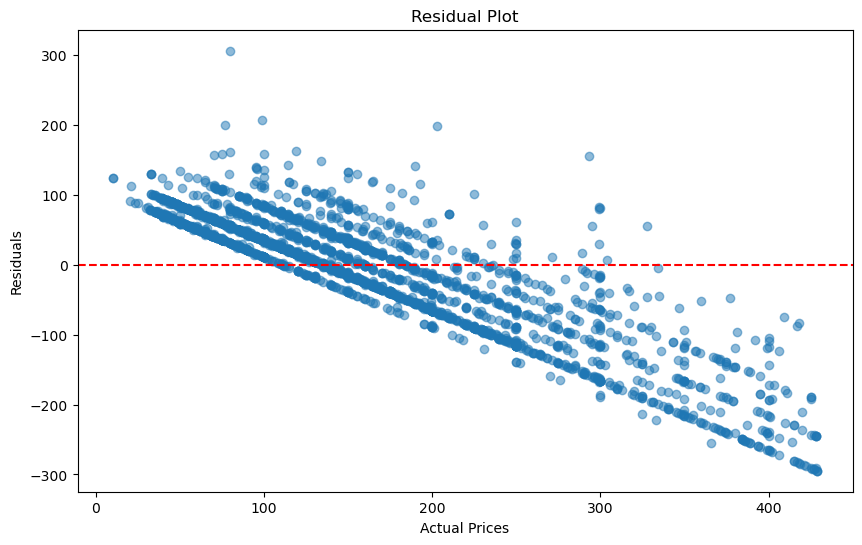

In [58]:
# Plotting the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


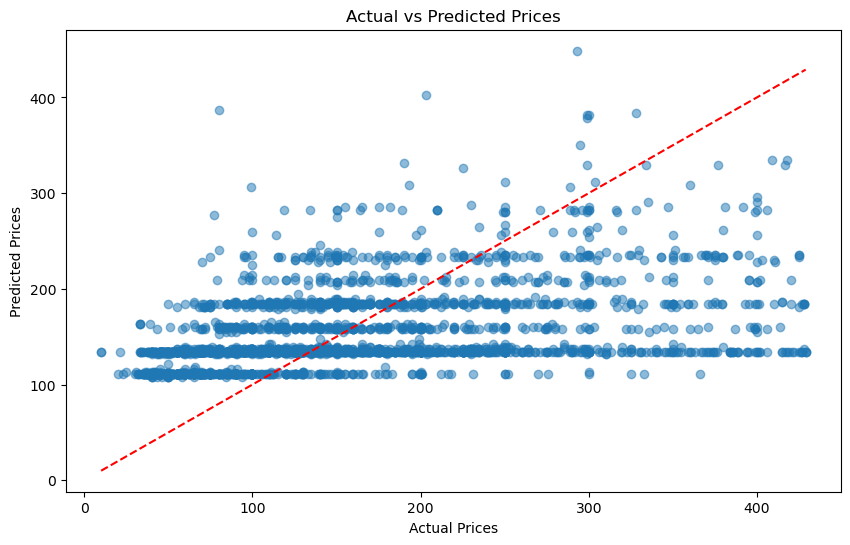

In [62]:

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

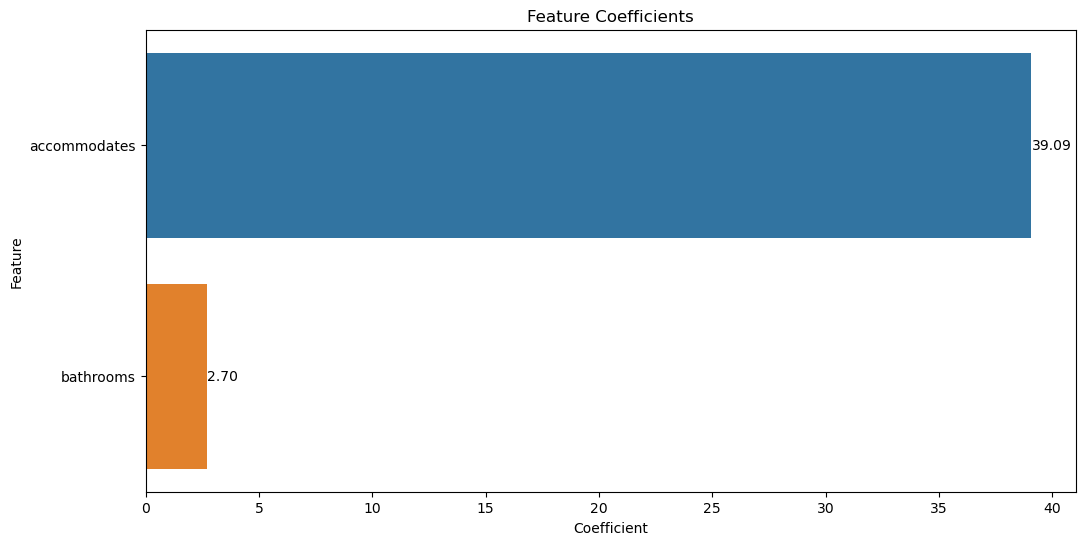

In [71]:
# Plotting the coefficients with values
coefficients_df = pd.DataFrame({
    'Feature': selected_feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Coefficient', y='Feature', data=coefficients_df)
plt.title('Feature Coefficients')

# Add value annotations on the bars
for i, v in enumerate(coefficients_df['Coefficient']):
    ax.text(v, i, f'{v:.2f}', color='black', ha='left', va='center')

plt.show()


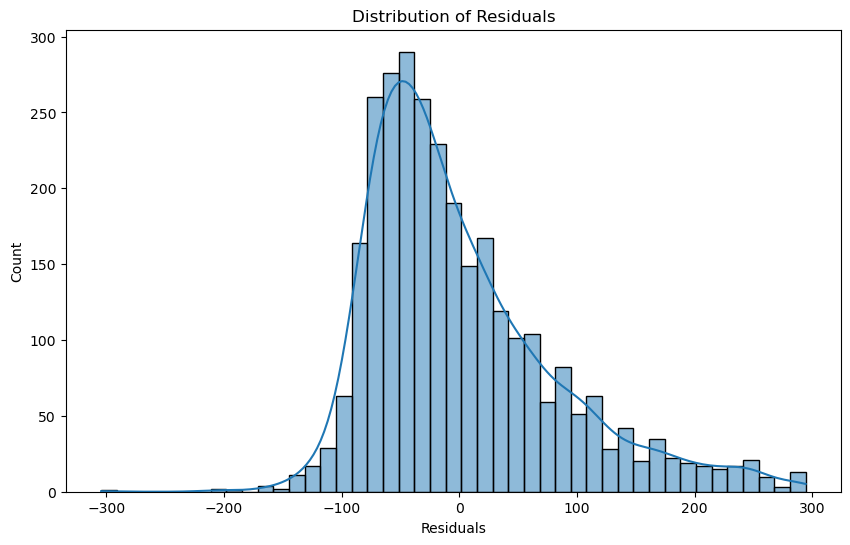

In [74]:
# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()
